In [1]:
from scipy.spatial.distance import pdist
import collections
import seaborn as sns
import subprocess
import numpy as np
import itertools as it
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from  imp import reload
import sys
sys.path.append('top-k-mallows/')
import mallows_kendall as mk
import permutil as pu



/tmp/ipykernel_53810/1801417582.py:10: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from  imp import reload


# what happens as more and more metrics are corrpted?


In [2]:
def phi_to_w(phi):
    return np.exp([n-phi*i for i in range(n)])

def Borda_u_m(data):
    return data.sum(axis=1).argsort().argsort().sum(axis=0).argsort().argsort()
def Borda_m_u(data):
    return data.sum(axis=0).argsort().argsort().sum(axis=0).argsort().argsort()
def Borda(data):
    return data.reshape(m*p,-1).sum(axis=0).argsort().argsort()

def Mean_u_m(data):
    return data.mean(axis=1).mean(axis=0).argsort().argsort()[::-1]
def Mean_m_u(data):
    return data.mean(axis=0).mean(axis=0).argsort().argsort()[::-1]
def Mean(data):
    return data.reshape(m*p,-1).mean(axis=0).argsort().argsort()[::-1]

<AxesSubplot: xlabel='# Corrupted Metrics', ylabel='Error'>

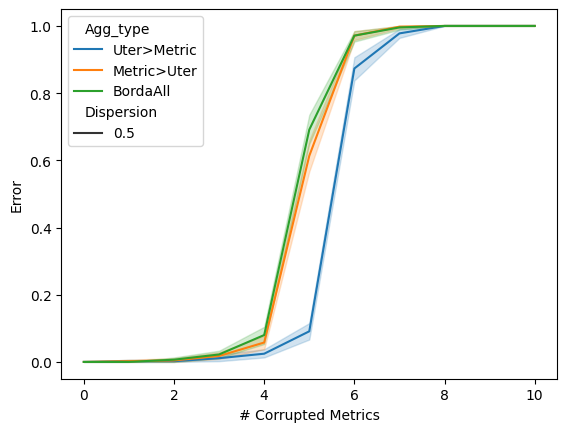

In [3]:

n = 10 # numer of systems
m = 11 # numner of metrics
p = 12 # number of utterances
repes = 10
N = n*(n-1)/2
phis_honest = [.01, .1,.5] 

res, sol=[] , []
for repe in range(repes):
    for phi_honest in phis_honest : #np.linspace(0,.1, 2):
        honest_full = pu.plackett_luce_sample(m*p,n,w=phi_to_w(phi_honest))
        honest_full= honest_full.reshape(m,p,n)

    for num_corrupted_metrics in range(m):
        bum, bmu, b = Borda_u_m(honest_full),Borda_m_u(honest_full),Borda(honest_full)
        dum, dmu, db = mk.distance(bum), mk.distance(bmu), mk.distance(b)
        res.append([repe,phi_honest,num_corrupted_metrics,dum, dmu, db])
        # now, at the end of the iter , we corrupt . 
        manip = np.tile(np.arange(n)[::-1], (p, 1))  
        honest_full[num_corrupted_metrics,:,:] = manip

df = pd.DataFrame(res,columns=['repe','Dispersion','# Corrupted Metrics','Uter>Metric', 'Metric>Uter', 'BordaAll'])
df = df.melt(id_vars=['repe','Dispersion','# Corrupted Metrics'],var_name='Agg_type',value_name='Error')
df['Error'] = df['Error']/N
sns.lineplot(data=df,x='# Corrupted Metrics',y='Error', style='Dispersion',hue='Agg_type')

<AxesSubplot: xlabel='# Corrupted Metrics', ylabel='Error'>

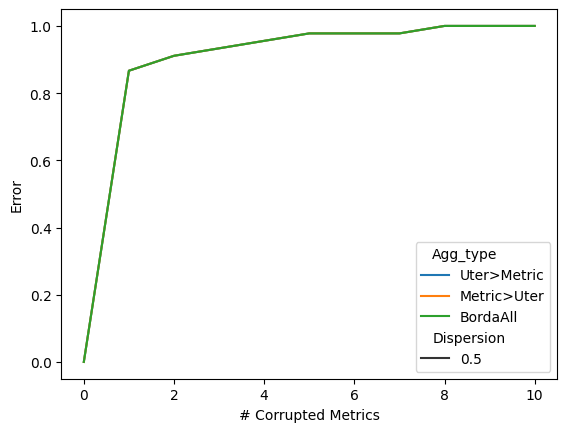

In [4]:
manip_factor = 1000
repes = 1
res, sol=[] , []
for repe in range(repes):
    for phi_honest in phis_honest : 
        honest_full = np.array([np.random.gumbel(phi_to_w(phi_honest), 1) for i in range(m*p)])
        honest_full= honest_full.reshape(m,p,n)
    for num_corrupted_metrics in range(m):
        bum, bmu, b = Mean_u_m(honest_full),Mean_m_u(honest_full),Mean(honest_full)
        dum, dmu, db = mk.distance(bum), mk.distance(bmu), mk.distance(b)
        res.append([repe,phi_honest,num_corrupted_metrics,dum, dmu, db])
        manip = np.tile(np.random.gumbel(manip_factor*phi_to_w(1), 1)[::-1], (p, 1))  
        honest_full[num_corrupted_metrics,:,:] = manip


df = pd.DataFrame(res,columns=['repe','Dispersion','# Corrupted Metrics','Uter>Metric', 'Metric>Uter', 'BordaAll'])
df = df.melt(id_vars=['repe','Dispersion','# Corrupted Metrics'],var_name='Agg_type',value_name='Error')
df['Error'] = df['Error']/N
sns.lineplot(data=df,x='# Corrupted Metrics',y='Error', style='Dispersion',hue='Agg_type')